In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from lmfit import Parameters, minimize, fit_report
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [2]:
dataBase_path = r'./'
biological_file = r'biological_COT_Data.ods'

In [3]:
data_path = Path(dataBase_path, biological_file)
bioDF = pd.read_excel(data_path, sheet_name='Videler and Nolet')
bio_kinematics = pd.read_excel(data_path, sheet_name='Videler Kinematic')
baleDF = pd.read_excel(data_path, sheet_name='Bale_CE')
bioDF = bioDF.sort_values('Weight [kg]')
schmidtDF = pd.read_excel(data_path, sheet_name='Schmidt-Nielsen')

In [4]:
# break up the data frame into perspective locomotion modes
bio_modes = bioDF['Mode'].unique()
bio_dfs = [bioDF[bioDF['Mode']==mode] for mode in bio_modes]
bale_modes = baleDF['Type'].unique()
bale_dfs = [baleDF[baleDF['Type']==mode] for mode in bale_modes]
schmidt_modes = schmidtDF['Mode'].unique()
schmidt_dfs = [schmidtDF[schmidtDF['Mode']==mode] for mode in schmidt_modes]

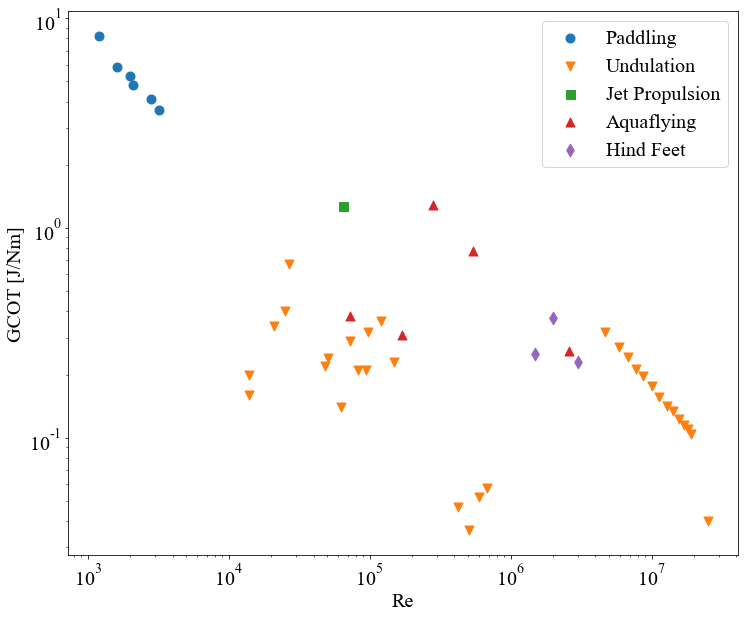

In [5]:
fig1, ax1 = plt.subplots(figsize=(12,10), facecolor='w')

fit_method = 'least_squares'

markers = ['o', 'v', 's', '^', 'd']


for i, mode in enumerate(bio_modes):

        ax1.scatter(bio_dfs[i]['Re'], bio_dfs[i]['COTopt [J/Nm]'], marker=markers[i], label=mode) 

ax1.set_xlabel('Re')
ax1.set_ylabel('GCOT [J/Nm]')
ax1.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
#fig1.savefig('videler_GCOT_Re.pdf', facecolor='w', dpi=300, bbox_inches='tight')

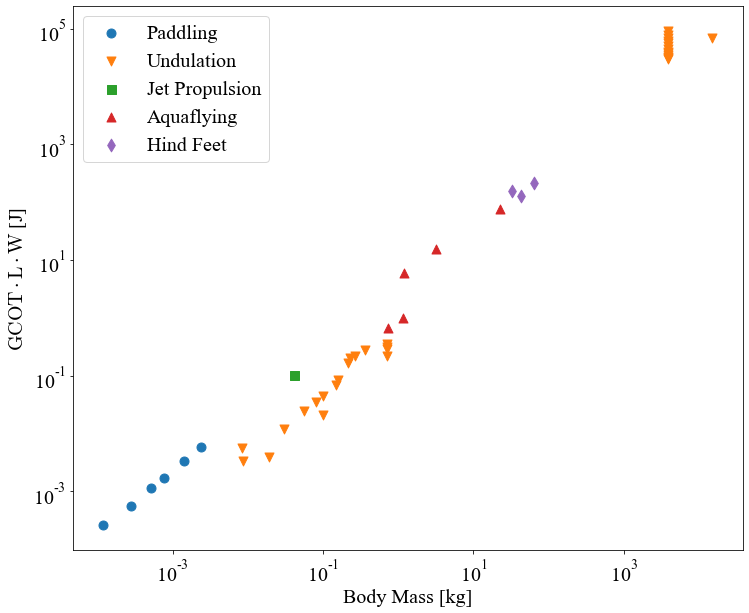

In [6]:
fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')

fit_method = 'least_squares'

markers = ['o', 'v', 's', '^', 'd']


for i, mode in enumerate(bio_modes):

        ax2.scatter(bio_dfs[i]['Weight [kg]'], bio_dfs[i]['GCOTLW'], marker=markers[i], label=mode) 

ax2.set_xlabel('Body Mass [kg]')
ax2.set_ylabel('$\mathrm{GCOT \cdot L \cdot W}$ [J]')
ax2.legend()
ax2.set_yscale('log')
ax2.set_xscale('log')
#fig2.savefig('videler_GCOTLW_Mass.pdf', facecolor='w', dpi=300, bbox_inches='tight')


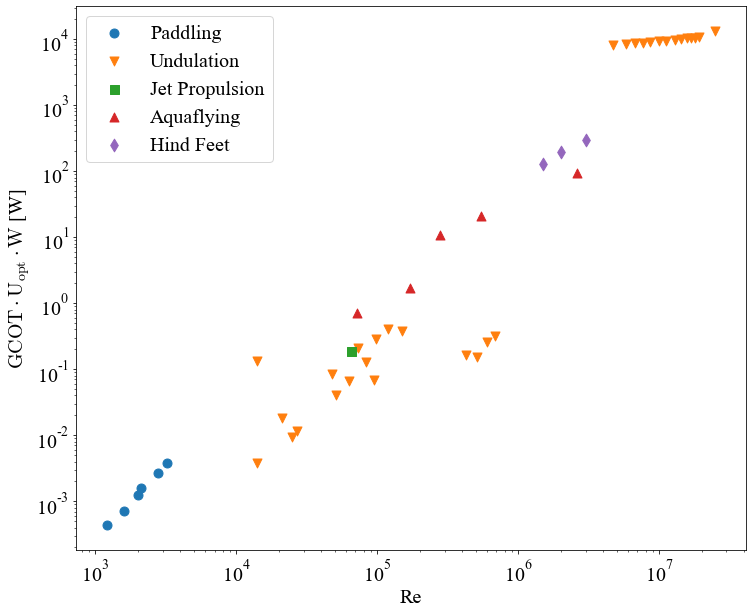

In [7]:
fig3, ax3 = plt.subplots(figsize=(12,10), facecolor='w')

fit_method = 'least_squares'

markers = ['o', 'v', 's', '^', 'd']


for i, mode in enumerate(bio_modes):

        ax3.scatter(bio_dfs[i]['Re'], bio_dfs[i]['GCOTuW'], marker=markers[i], label=mode) 

ax3.set_xlabel('Re')
ax3.set_ylabel('$\mathrm{GCOT \cdot U_{opt} \cdot W}$ [W]')
ax3.legend()
ax3.set_yscale('log')
ax3.set_xscale('log')
#fig3.savefig('videler_GCOTuW_Re.pdf', facecolor='w', dpi=300, bbox_inches='tight')

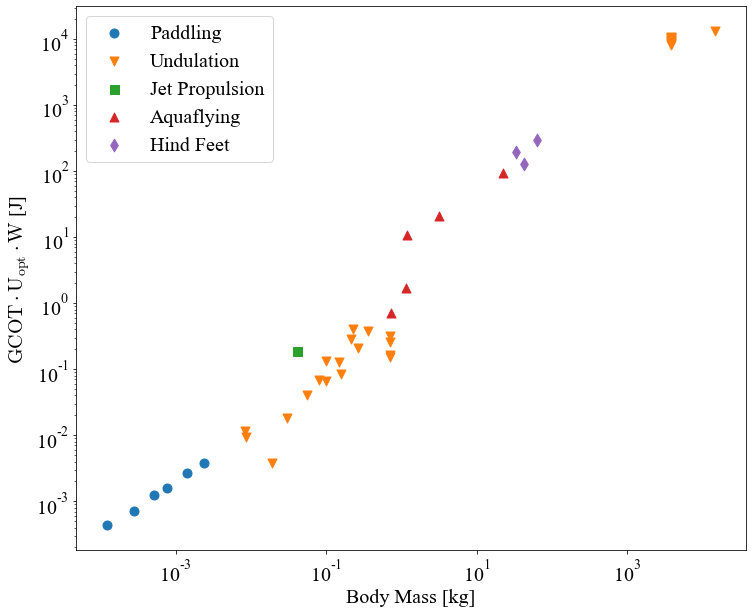

In [8]:
fig4, ax4 = plt.subplots(figsize=(12,10), facecolor='w')

fit_method = 'least_squares'

markers = ['o', 'v', 's', '^', 'd']


for i, mode in enumerate(bio_modes):

    ax4.scatter(bio_dfs[i]['Weight [kg]'], bio_dfs[i]['GCOTuW'], marker=markers[i], label=mode) 

ax4.set_xlabel('Body Mass [kg]')
ax4.set_ylabel('$\mathrm{GCOT \cdot U_{opt} \cdot W}$ [J]')
ax4.legend()
ax4.set_yscale('log')
ax4.set_xscale('log')
#fig4.savefig('videler_GCOTuW_Mass.pdf', facecolor='w', dpi=300, bbox_inches='tight')

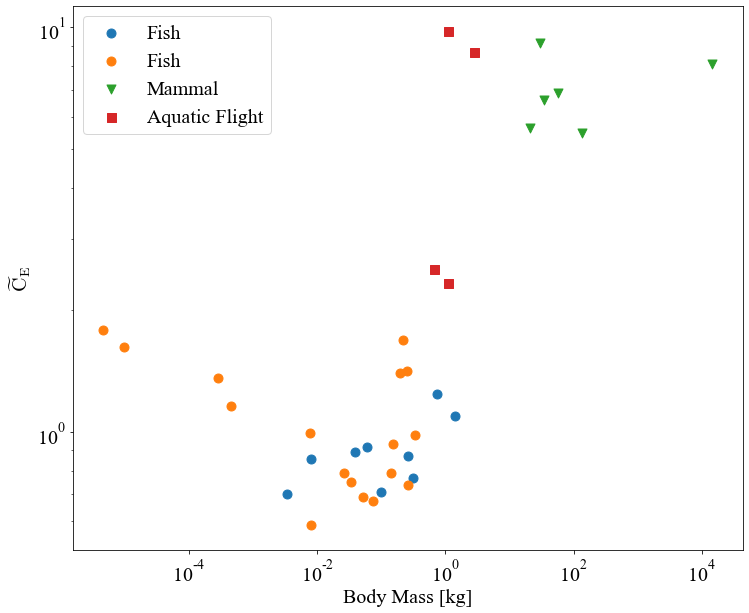

In [9]:
fig5, ax5 = plt.subplots(figsize=(12,10), facecolor='w')

fit_method = 'least_squares'

markers = ['o', 'v', 's', '^', 'd']


for i, mode in enumerate(bale_modes):
    if mode == 'Fish':
        ref1 = bale_dfs[i][bale_dfs[i]['Reference']==1]
        ref2 = bale_dfs[i][bale_dfs[i]['Reference']==2]
        ax5.scatter(ref1['Mass'], ref1['Ce'], marker=markers[i], label=mode)
        ax5.scatter(ref2['Mass'], ref2['Ce'], marker=markers[i], label=mode)
    else:
        ax5.scatter(bale_dfs[i]['Mass'], bale_dfs[i]['Ce'], marker=markers[i], label=mode)

ax5.set_xlabel('Body Mass [kg]')
ax5.set_ylabel('$\mathrm{\widetilde{C}_E}$')
ax5.legend()
ax5.set_yscale('log')
ax5.set_xscale('log')
#fig5.savefig('bale_Ce_Mass.pdf', facecolor='w', dpi=300, bbox_inches='tight')

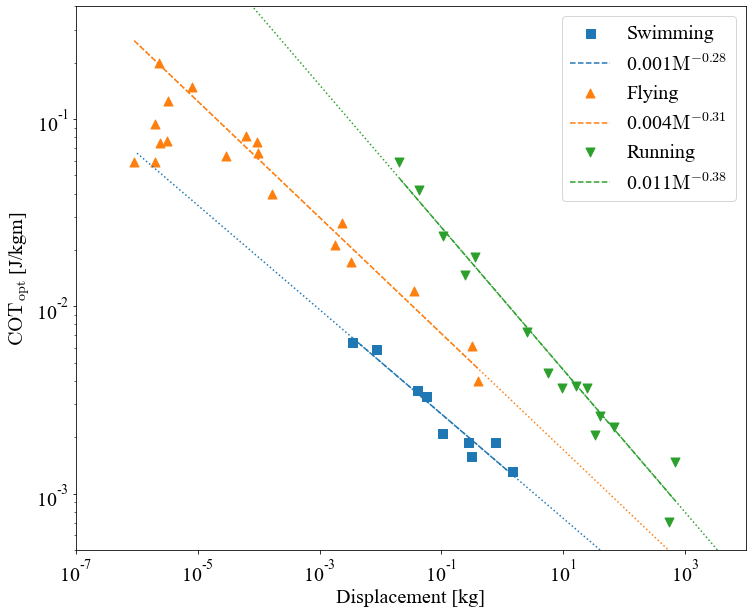

In [10]:
fig6, ax6 = plt.subplots(figsize=(12, 10), facecolor='w')
markers = ['s', '^', 'v', 'o', '*']

col = ['C0', 'C1', 'C2']

model = PowerLawModel(prefix='p_')
dx = np.linspace(1e-6, 1e4, 50)
for i, mode in enumerate(schmidt_modes):
    if mode == "Flying":

        amplitude = 0.0035
        exponent = -0.31

        ax6.scatter(schmidt_dfs[i]['Mass [kg]'], schmidt_dfs[i]['COTopt [J/kgm]'], marker=markers[i], color=col[i], label=mode)

        ax6.plot(schmidt_dfs[i]['Mass [kg]'], amplitude*schmidt_dfs[i]['Mass [kg]'].values**exponent, col[i] + '--', 
                label=str(np.round(amplitude, 3)) + '$\mathrm{M^{' + str(np.round(exponent,2)) + '}}$')

        ax6.plot(dx, amplitude*dx**exponent, col[i] + ':')
    elif mode == "Running":
        amplitude = 0.011
        exponent = -0.38

        ax6.scatter(schmidt_dfs[i]['Mass [kg]'], schmidt_dfs[i]['COTopt [J/kgm]'], marker=markers[i], color=col[i], label=mode)

        ax6.plot(schmidt_dfs[i]['Mass [kg]'], amplitude*schmidt_dfs[i]['Mass [kg]'].values**exponent, col[i] + '--', 
                label=str(np.round(amplitude, 3)) + '$\mathrm{M^{' + str(np.round(exponent,2)) + '}}$')

        ax6.plot(dx, amplitude*dx**exponent, col[i] + ':')
    else:
        pars = model.guess(schmidt_dfs[i]['COTopt [J/kgm]'].values, x=schmidt_dfs[i]['Mass [kg]'].values)
        pars['p_amplitude'].set(value=6, min=0.0001, max=10.0)
        pars['p_exponent'].set(value=-0.5, min=-2.0, max=0.001)
        
        fit = model.fit(schmidt_dfs[i]['COTopt [J/kgm]'].values, pars, x=schmidt_dfs[i]['Mass [kg]'].values)

        ax6.scatter(schmidt_dfs[i]['Mass [kg]'], schmidt_dfs[i]['COTopt [J/kgm]'], marker=markers[i], color=col[i], label=mode)

        ax6.plot(schmidt_dfs[i]['Mass [kg]'], fit.params['p_amplitude'].value*schmidt_dfs[i]['Mass [kg]'].values**fit.params['p_exponent'].value, col[i] + '--', 
                label=str(np.round(fit.params['p_amplitude'].value, 3)) + '$\mathrm{M^{' + str(np.round(fit.params['p_exponent'].value,2)) + '}}$')

        ax6.plot(dx, fit.params['p_amplitude'].value*dx**fit.params['p_exponent'].value, col[i] + ':')

ax6.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax6.set_xlabel('Displacement [kg]')
ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_ylim([5e-4, 4e-1])
ax6.set_xlim([1e-7, 1e4])
ax6.legend()
#ax6.grid()
#fig6.savefig('schmidt_COT_mass.pdf', facecolor='w', dpi=300, bbox_inches='tight')